<style>
    h1,h2,h3,h4 {
        font-family: 'AppleMyungjo', 'Helvetica Neue', sans-serif;
    }
    body {
        font-family: 'Georgia', serif;
    }
</style>

<img src="./logo.png" align="right" height='64px' width='64px'>

<div style="text-align: left">
    <h1>
        Handwritten OCR Demo
    </h1>
    <p>Using GCP Document AI</p>
</div>

In [2]:
from HandwrittenOCR import *
import ftfy
import re
from PIL import Image, ImageDraw, ImageFont
import textwrap
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
import warnings
import numpy as np
warnings.filterwarnings('ignore')

# create_processed_image('gettysburg')

(-0.5, 727.5, 901.5, -0.5)

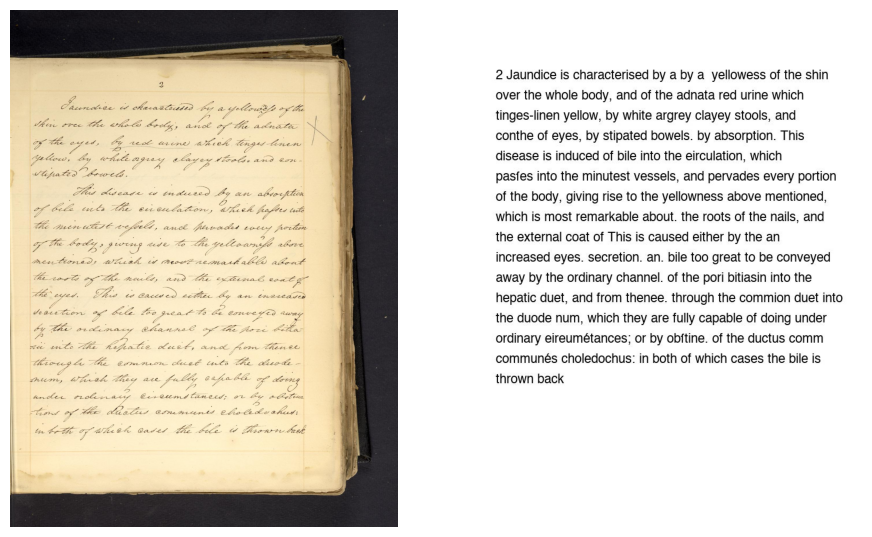

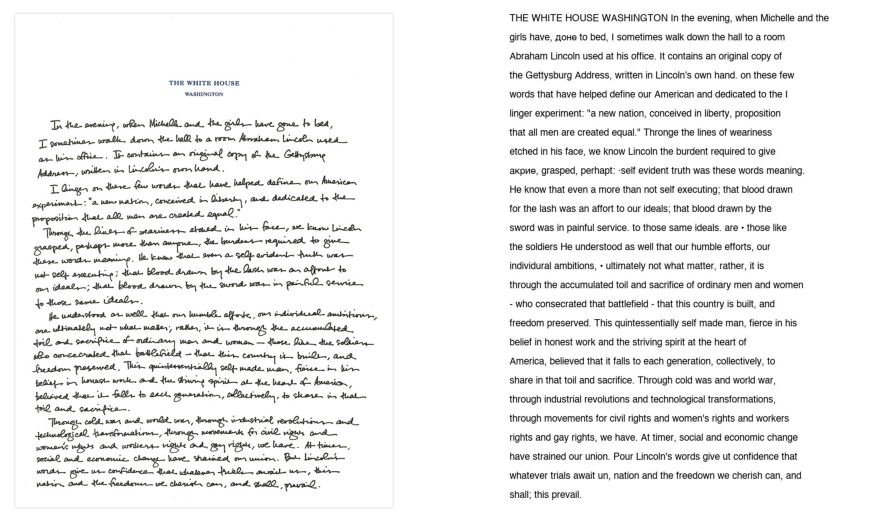

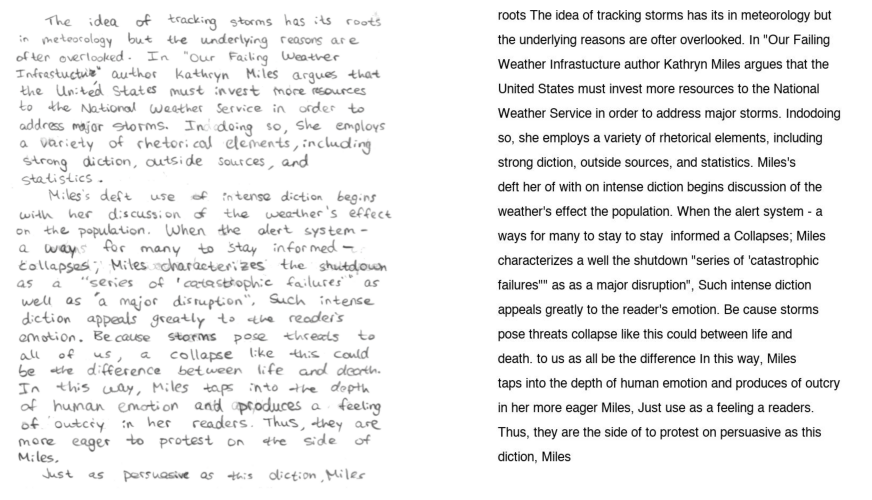

In [3]:
%matplotlib inline

# figure size in inches optional
rcParams['figure.figsize'] = 11 ,8

# read images
img_A = mpimg.imread('./jaundice.jpeg')
img_B = mpimg.imread('./jaundice-formatted.jpg')

# display images
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_A)
ax[0].axis('off')
ax[1].imshow(img_B)
ax[1].axis('off')

# read images
img_A = mpimg.imread('./gettysburg.jpeg')
img_B = mpimg.imread('./gettysburg-formatted.jpg')

# display images
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_A)
ax[0].axis('off')
ax[1].imshow(img_B)
ax[1].axis('off')

# read images
img_A = mpimg.imread('./SAT.png')
img_B = mpimg.imread('./SAT-formatted.jpg')

# display images
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_A)
ax[0].axis('off')
ax[1].imshow(img_B)
ax[1].axis('off')

BEST:


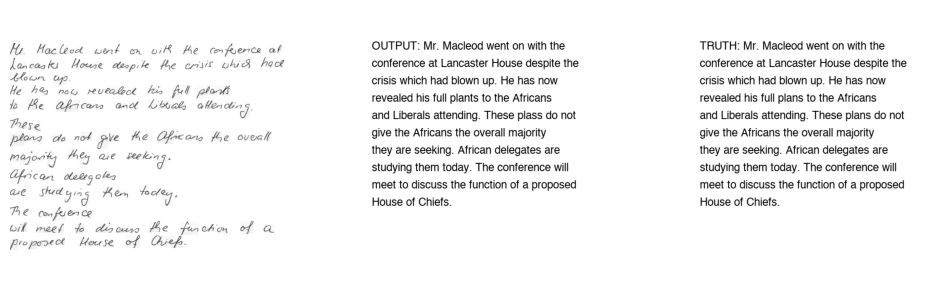

WORST:


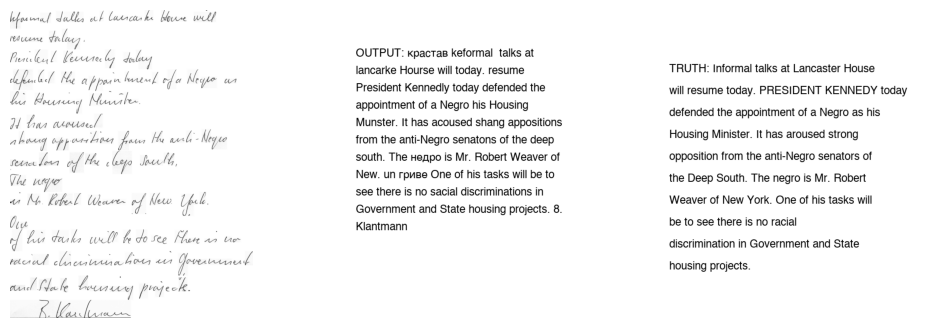

In [6]:
# WARNING, the first time you run this it will take a while to populate metrics. Assume 2 minutes+, I haven't timed it.

try: metrics
except: metrics = get_performance_metrics()
best_subdir = metrics['best_performer']['subdir']
worst_subdir = metrics['worst_performer']['subdir']

print('BEST:')
# read images
img_A = mpimg.imread(f'{best_subdir}/combined.png')
create_image_with_wrapped_text(f"OUTPUT: {metrics['best_performer']['text']}", 'Helvetica', 24, f'{best_subdir}/processed.png', width=600, height=600)
img_B = mpimg.imread(f'{best_subdir}/processed.png')
create_image_with_wrapped_text(f"TRUTH:\n{metrics['best_performer']['truth']}", 'Helvetica', 24, f'{best_subdir}/truth.png', width=600, height=600)
img_C = mpimg.imread(f'{best_subdir}/truth.png')

# display images
fig, ax = plt.subplots(1,3,figsize=(12,4))
ax[0].imshow(img_A)
ax[0].axis('off')
ax[1].imshow(img_B)
ax[1].axis('off')
ax[2].imshow(img_C)
ax[2].axis('off')
plt.show()

print('WORST:')
# read images
img_A = mpimg.imread(f'{worst_subdir}/combined.png')
create_image_with_wrapped_text(f"OUTPUT: {metrics['worst_performer']['text']}", 'Helvetica', 24, f'{worst_subdir}/processed.png', width=600, height=600)
img_B = mpimg.imread(f'{worst_subdir}/processed.png')
create_image_with_wrapped_text(f"TRUTH:\n{metrics['worst_performer']['truth']}", 'Helvetica', 24, f'{worst_subdir}/truth.png', width=600, height=600)
img_C = mpimg.imread(f'{worst_subdir}/truth.png')

# display images
fig, ax = plt.subplots(1,3,figsize=(12,4))
ax[0].imshow(img_A)
_ = ax[0].axis('off')
ax[1].imshow(img_B)
_ =ax[1].axis('off')
ax[2].imshow(img_C)
_ =ax[2].axis('off')

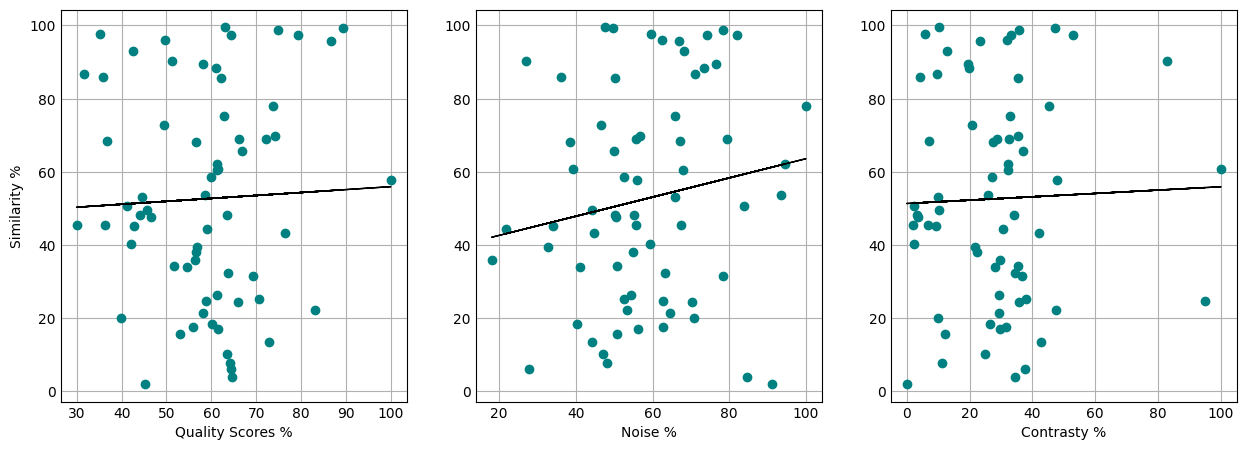

Similarity: A rough representation of character-level similarity between output and ground-level truth.
Quality Scores: A rough representation of the blurriness of an image.
Noise: A rough representation of the noise in an image (focused on white noise).
Contrasty: A measure of how dark the text was against the white background.


In [10]:
try: metrics
except: metrics = get_performance_metrics()
differences = metrics['difflibs']
distances = metrics['distance']
sequences = metrics['sequences']
image_metrics = metrics['image_metrics']

quality_scores = np.array([image_metric['quality_score'] for image_metric in image_metrics])
faintnesses = np.array([image_metric['faintness'] for image_metric in image_metrics])
noise = np.array([image_metric['noise'] for image_metric in image_metrics])
darknesses = np.array([image_metric['darkness'] for image_metric in image_metrics])

def do_graph(x, y, offset, axs, x_label, y_label):
    plt.style.use('_mpl-gallery')

    score_group = x
    normalized_scores = [abs(offset - abs(score*100/max(abs(np.array(score_group))))) for score in score_group]
    axs.scatter(normalized_scores, y, linewidth=1.0, color='teal')
    a, b = np.polyfit(normalized_scores, y, 1)
    axs.plot(normalized_scores, a*np.array(normalized_scores)+b, linewidth=1.0, color='black')
    
    axs.set_xlabel(x_label)
    if y_label != None:
        axs.set_ylabel(y_label)
    

plt.style.use('_mpl-gallery')
fig, axs = plt.subplots(1, 3, figsize=(12,4))
do_graph(quality_scores, differences, 0, axs[0], 'Quality Scores %', 'Similarity %')
do_graph(noise, differences, 0, axs[1], 'Noise %', None)
do_graph(darknesses - min(darknesses), differences, 100, axs[2], 'Contrasty %', None)
plt.show()